Demonstrating and comparing different layout features and seeing how they affect bias

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Blockage metrics
https://journals.ametsoc.org/view/journals/atot/33/3/jtech-d-14-00199_1.xml

Take an example layout and wind direction and evaluate:
- Blockage ratio
- Blockage distance

In [12]:
from utils import blockage_metrics

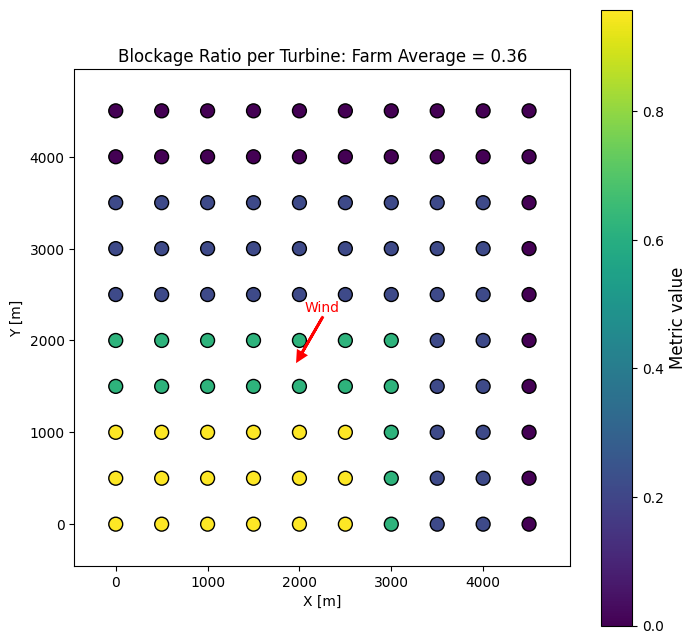

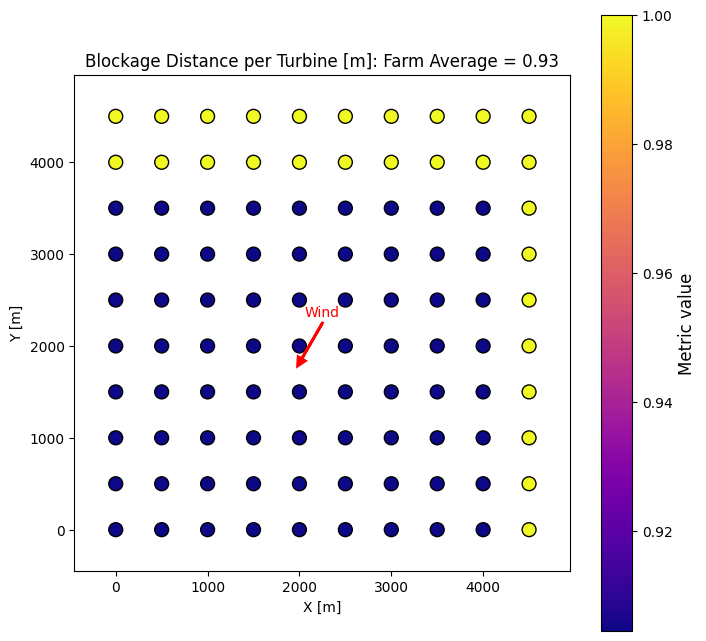

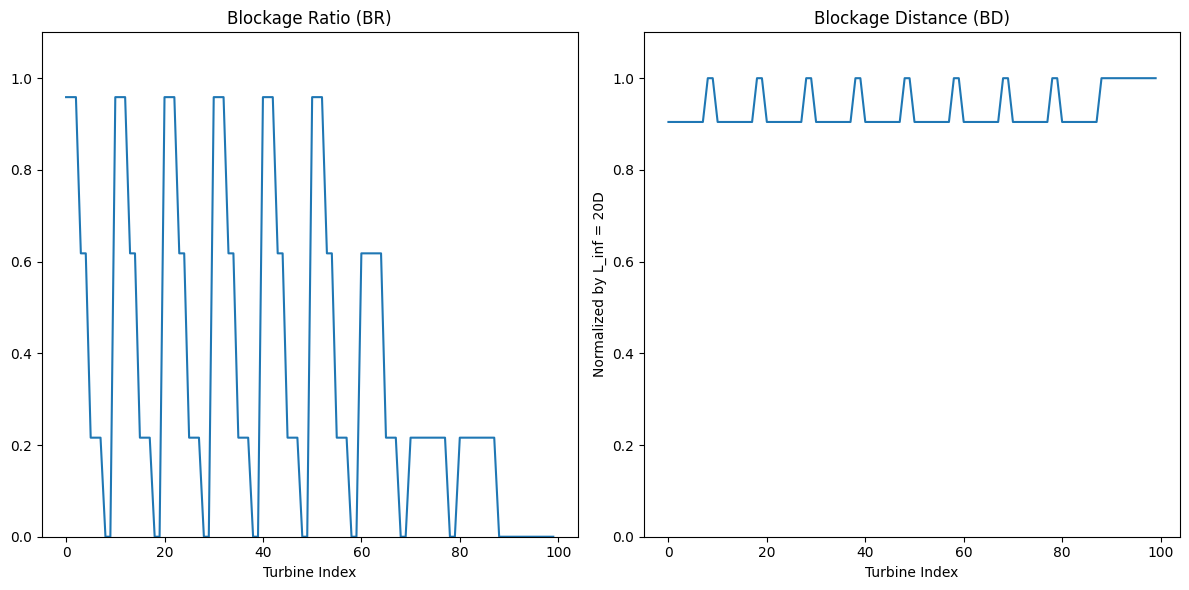

In [13]:
D = 100  # meters
spacing = 5 * D  # 500 meters
wind_dir=30

x = []
y = []
# setting up an evenly spaced grid for demonstration
for i in range(10):
    for j in range(10):
        x.append(i * spacing)
        y.append(j * spacing)

x = np.array(x)
y = np.array(y)
xy = np.column_stack((x, y))

BR, BD, BR_farm, BD_farm = blockage_metrics(xy, wind_dir, D,plot=True)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(BR)
ax[0].set_ylim([0,1.1])
ax[0].set_xlabel('Turbine Index')

ax[0].set_title('Blockage Ratio (BR)')

ax[1].plot(BD)
ax[1].set_ylim([0,1.1])
ax[1].set_xlabel('Turbine Index')
ax[1].set_ylabel('Normalized by L_inf = 20D')
ax[1].set_title('Blockage Distance (BD)')

plt.tight_layout()

Farm Length & Width


In [14]:
from utils import farm_length_width

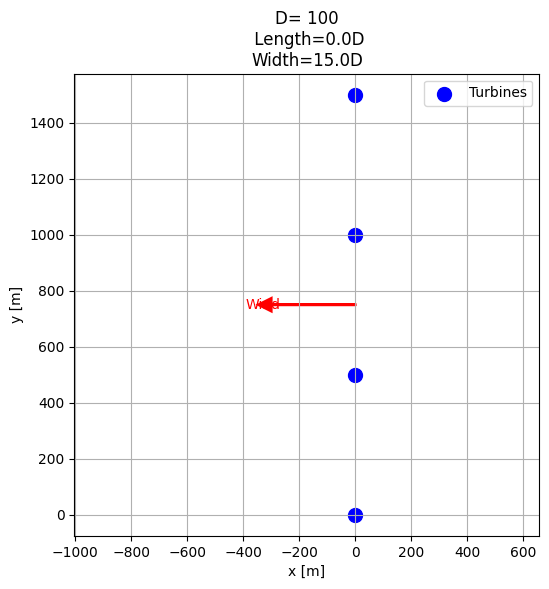

In [15]:
D = 100  # meters
spacing = 5 * D  # 500 meters
direction=90

x = []
y = []
# setting up an evenly spaced grid for demonstration
for i in range(1):
    for j in range(4):
        x.append(i * spacing)
        y.append(j * spacing)

x = np.array(x)
y = np.array(y)
length, width=farm_length_width(x,y,direction,D,plot=True)



# Looking at the effect of each layout feature on the bias (assuming we have already generated the database and added the features in the db_output_analysis notebook)

In [16]:
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load dataset and create version in dataframe format
xr_data=xr.load_dataset("results_stacked_hh_best_sample.nc")
df=xr_data.to_dataframe().reset_index()
df['log_z0']=np.log(df['z0'].values)
xr_data

<xarray.Dataset> Size: 55kB
Dimensions:                      (case_index: 182)
Coordinates:
    sample                       float64 8B 95.0
    k_b                          float64 8B 0.02422
    ss_alpha                     float64 8B 1.216
    wind_farm                    (case_index) <U31 23kB 'HR1' ... 'VirtWF_ABL...
    flow_case                    (case_index) float64 1kB 0.0 1.0 ... 14.0 15.0
Dimensions without coordinates: case_index
Data variables: (12/22)
    model_bias_cap               (case_index) float64 1kB 0.04089 ... 0.04573
    pw_power_cap                 (case_index) float64 1kB 0.6012 ... 0.4696
    ref_power_cap                (case_index) float64 1kB 0.5603 ... 0.4238
    wind_speed                   (case_index) float64 1kB 9.947 9.971 ... 12.97
    wind_direction               (case_index) float64 1kB 14.98 9.983 ... 270.0
    turbulence_intensity         (case_index) float64 1kB 0.0538 ... 0.03155
    ...                           ...
    nt                           (case_index) int64 1kB 80 80 80 ... 100 100 100
    farm_density                 (case_index) float64 1kB 2.452e+05 ... 1.633...
    Blockage_Ratio               (case_index) float64 1kB 0.1439 ... 0.8986
    Blocking_Distance            (case_index) float64 1kB 1.0 1.0 ... 0.326
    Farm_Length                  (case_index) float64 1kB 62.0 58.0 ... 45.0
    Farm_Width                   (case_index) float64 1kB 79.0 76.0 ... 45.0

In [17]:
df

,case_index,model_bias_cap,pw_power_cap,ref_power_cap,wind_speed,wind_direction,turbulence_intensity,potential_temperature,epsilon,k,...,sample,k_b,ss_alpha,wind_farm,flow_case,Blockage_Ratio,Blocking_Distance,Farm_Length,Farm_Width,log_z0
0,0,0.040892,0.601209,0.560317,9.946975,14.983102,0.053803,293.157143,0.001880,0.429605,...,95.0,0.024222,1.215986,HR1,0.0,0.143910,1.000000,62.0,79.0,-6.170591
1,1,0.030604,0.588636,0.558032,9.971009,9.983315,0.069163,293.164520,0.003978,0.713338,...,95.0,0.024222,1.215986,HR1,1.0,0.112734,1.000000,58.0,76.0,-3.872802
2,2,0.142139,0.611852,0.469713,9.952359,4.983150,0.060814,293.160126,0.002704,0.549462,...,95.0,0.024222,1.215986,HR1,2.0,0.212993,1.000000,53.0,73.0,-4.981465
3,3,0.246846,0.586083,0.339237,9.955688,-0.016862,0.057949,293.158852,0.002347,0.499248,...,95.0,0.024222,1.215986,HR1,3.0,0.058441,0.961863,49.0,69.0,-5.434137
4,4,-0.204157,0.254016,0.458173,9.950229,-5.016874,0.058088,293.158852,0.002360,0.501094,...,95.0,0.024222,1.215986,HR1,4.0,0.607518,0.604999,54.0,64.0,-5.411038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,177,-0.010677,0.468952,0.479629,12.965957,269.993759,0.038599,293.156396,0.000678,0.375708,...,95.0,0.024222,1.215986,VirtWF_ABL_IEA22,11.0,0.898726,0.325955,45.0,45.0,-8.517193
178,178,-0.093838,0.471047,0.564885,12.981516,269.993522,0.038991,293.156396,0.000686,0.384297,...,95.0,0.024222,1.215986,VirtWF_ABL_IEA22,12.0,0.898726,0.325955,45.0,45.0,-8.517193
179,179,0.101758,0.471369,0.369612,12.983409,269.950750,0.020000,293.305418,0.000616,0.101148,...,95.0,0.024222,1.215986,VirtWF_ABL_IEA22,13.0,0.895262,0.328554,45.0,45.0,-8.517193
180,180,0.051973,0.469825,0.417852,12.972423,269.985570,0.027499,293.177894,0.000582,0.190891,...,95.0,0.024222,1.215986,VirtWF_ABL_IEA22,14.0,0.898319,0.326261,45.0,45.0,-8.517193


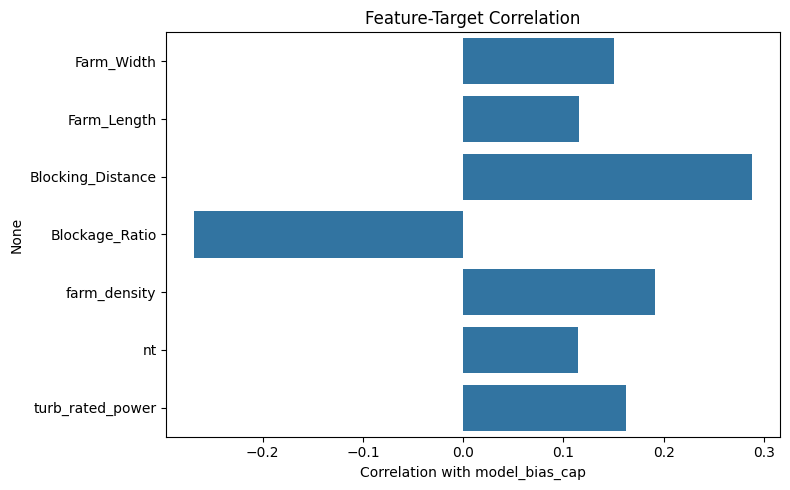

In [18]:
features = df[['Farm_Width', 'Farm_Length', 'Blocking_Distance', 'Blockage_Ratio', 'farm_density', 'nt', 'turb_rated_power']]
target = df['model_bias_cap']

# Compute correlation between each feature and the target
feature_target_corr = features.corrwith(target)

feature_target_corr.sort_values(ascending=False)


plt.figure(figsize=(8,5))
sns.barplot(x=feature_target_corr.values, y=feature_target_corr.index, orient='h')
plt.xlabel('Correlation with model_bias_cap')
plt.title('Feature-Target Correlation')
plt.tight_layout()
plt.show()